In [82]:
import os
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import Point
from random import randint, uniform
import matplotlib.pyplot as plt

import urllib.request
import shutil
from pathlib import Path
from zipfile import ZipFile

import geopandas as gpd
from geopandas.tools import sjoin

import folium
from branca.colormap import linear

## Load data sources:

In [83]:
#2010 and 2020 Decennial Census population and race counts by Census tract. 
census_2010 = pd.read_csv('../data/DECENNIALPL2010.P1_data_with_overlays_2021-10-12T094314.csv')
census_2020 = pd.read_csv('../data/DECENNIALPL2020_P1_data_with_overlays_2021-10-04T225000.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
#Opportunity Zones shapefile. Includes every designation in the country.

file_URL = 'https://www.cdfifund.gov/sites/cdfi/files/documents/opportunity-zones=8764.-9-10-2019.zip'
local_file_name = 'opzones.zip'
file_Path = Path('../data/')
file_Path /= local_file_name

with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

    
to_unzip = ZipFile('../data/opzones.zip', 'r')
unzipped = '../data/opzones_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file

In [85]:
opzones = gpd.GeoDataFrame.from_file(shape_file)

In [86]:
#From Module 3, I'm borrowing our all-states shapefile.
file_URL = 'https://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_20m.zip'
local_file_name = 'cb_2016_us_state_20m.zip'

file_Path = Path('../data/')  
file_Path /= local_file_name

with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

to_unzip = ZipFile('../data/cb_2016_us_state_20m.zip', 'r')
unzipped = '../data/census_states'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file


In [87]:
states = gpd.read_file('../data/census_states')

#### From the American Community Survey's 5-year estimates, I compiled median income information by Census tract for just the state of Michigan. 

In [88]:
MI_income = pd.read_csv('../data/MI_Med_Income.csv')

### Data exploration:

In [89]:
census_2020.head().transpose()

0  \
GEO_ID                                                  id   
NAME                                  Geographic Area Name   
P1_001N                                           !!Total:   
P1_002N                  !!Total:!!Population of one race:   
P1_003N     !!Total:!!Population of one race:!!White alone   
...                                                    ...   
P1_067N   !!Total:!!Population of two or more races:!!P...   
P1_068N   !!Total:!!Population of two or more races:!!P...   
P1_069N   !!Total:!!Population of two or more races:!!P...   
P1_070N   !!Total:!!Population of two or more races:!!P...   
P1_071N   !!Total:!!Population of two or more races:!!P...   

                                                 1  \
GEO_ID                        1400000US01001020100   
NAME     Census Tract 201, Autauga County, Alabama   
P1_001N                                       1775   
P1_002N                                       1653   
P1_003N                                       1389   
...                                            ...   
P1_067N                                          0   
P1_068N                                          0   
P1_069N                                          0   
P1_070N                                          0   
P1_071N                                          0   

                                                 2  \
GEO_ID                        1400000US01001020200   
NAME     Census Tract 202, Autauga County, Alabama   
P1_001N                                       2055   
P1_002N                                       1984   
P1_003N                                        842   
...                                            ...   
P1_067N                                          0   
P1_068N                                          0   
P1_069N                                          0   
P1_070N                                          0   
P1_071N                                          0   

                                                 3  \
GEO_ID                        1400000US01001020300   
NAME     Census Tract 203, Autauga County, Alabama   
P1_001N                                       3216   
P1_002N                                       3039   
P1_003N                                       2244   
...                                            ...   
P1_067N                                          0   
P1_068N                                          0   
P1_069N                                          0   
P1_070N                                          0   
P1_071N                                          0   

                                                 4  
GEO_ID                        1400000US01001020400  
NAME     Census Tract 204, Autauga County, Alabama  
P1_001N                                       4246  
P1_002N                                       3993  
P1_003N                                       3578  
...                                            ...  
P1_067N                                          0  
P1_068N                                          0  
P1_069N                                          0  
P1_070N                                          0  
P1_071N                                          0  

[73 rows x 5 columns]

In [90]:
opzones.head().transpose()

0  \
CENSUSTRAC                                        01005950100   
STATENAME                                             Alabama   
COUNTYNAME                                            Barbour   
geometry    POLYGON ((-9497611.8639 3782655.561899997, -94...   

                                                            1  \
CENSUSTRAC                                        01027959000   
STATENAME                                             Alabama   
COUNTYNAME                                               Clay   
geometry    POLYGON ((-9569075.5261 3939765.4921, -9568963...   

                                                            2  \
CENSUSTRAC                                        01091972900   
STATENAME                                             Alabama   
COUNTYNAME                                            Marengo   
geometry    POLYGON ((-9771593.0645 3818223.800499998, -97...   

                                                            3  \
CENSUSTRAC                                        01069041500   
STATENAME                                             Alabama   
COUNTYNAME                                            Houston   
geometry    POLYGON ((-9507175.544 3666171.697899997, -950...   

                                                            4  
CENSUSTRAC                                        41015950100  
STATENAME                                              Oregon  
COUNTYNAME                                              Curry  
geometry    POLYGON ((-13872476.535 5282077.285599999, -13...

In [91]:
states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS      NAME LSAD         ALAND  \
0      23  01779787  0400000US23    23     ME     Maine   00   79885221885   
1      15  01779782  0400000US15    15     HI    Hawaii   00   16634100855   
2      04  01779777  0400000US04    04     AZ   Arizona   00  294198560125   
3      05  00068085  0400000US05    05     AR  Arkansas   00  134771517596   
4      10  01779781  0400000US10    10     DE  Delaware   00    5047194742   

        AWATER                                           geometry  
0  11748755195  MULTIPOLYGON (((-68.92401 43.88541, -68.87478 ...  
1  11777698394  MULTIPOLYGON (((-156.04965 19.78045, -156.0062...  
2   1027346486  POLYGON ((-114.79968 32.59362, -114.80939 32.6...  
3   2960191698  POLYGON ((-94.61792 36.49941, -94.36120 36.499...  
4   1398720828  POLYGON ((-75.77379 39.72220, -75.75323 39.757...

In [92]:
MI_income.head()

GEO_ID                                        NAME  \
0  1400000US26001000100     Census Tract 1, Alcona County, Michigan   
1  1400000US26001970100  Census Tract 9701, Alcona County, Michigan   
2  1400000US26001970400  Census Tract 9704, Alcona County, Michigan   
3  1400000US26001970500  Census Tract 9705, Alcona County, Michigan   
4  1400000US26001970600  Census Tract 9706, Alcona County, Michigan   

  Household_Median_Income_2019 Household_Median_Income_2018  \
0                        46154                        50323   
1                        44004                        43934   
2                        39761                        34947   
3                        35123                        35673   
4                        39950                        43875   

  Household_Median_Income_2017 Household_Median_Income_2010  
0                        49432                        38676  
1                        43686                        36071  
2                        36120                        35521  
3                        34830                        31790  
4                        41797                        35170

#### Working on the Census population information
For simplicity's sake, I'll keep the GEO_ID, the NAME, the Total population field and the P001003/P1_003N field which is the population of people who identify as "White Alone." Everyone else will be categorized as non-white, simplifying some of the analysis. 
I'll inner join the two years because there is going to be some where the census tract boundaries have changed with the re-drawing of lines. We'll see how much that affects the analysis later.

In [93]:
#Selecting columns, dropping the first row.
census_2010 = census_2010[['GEO_ID', 'NAME', 'P001001','P001003']].drop(0,axis=0)
census_2020 = census_2020[['GEO_ID', 'NAME', 'P1_001N','P1_003N']].drop(0,axis=0)

In [94]:
census_2010.head()

GEO_ID                                       NAME P001001  \
1  1400000US01001020100  Census Tract 201, Autauga County, Alabama    1912   
2  1400000US01001020200  Census Tract 202, Autauga County, Alabama    2170   
3  1400000US01001020300  Census Tract 203, Autauga County, Alabama    3373   
4  1400000US01001020400  Census Tract 204, Autauga County, Alabama    4386   
5  1400000US01001020500  Census Tract 205, Autauga County, Alabama   10766   

  P001003  
1    1622  
2     888  
3    2576  
4    4086  
5    8666

In [95]:
census = pd.merge(census_2010, census_2020, on=["GEO_ID","NAME"])
census = census.rename(columns={"P001001": "TotalPop2010", "P001003": "WhitePop2010", "P1_001N": "TotalPop2020", "P1_003N": "WhitePop2020"})

In [96]:
del census_2010
del census_2020

In [97]:
census['TotalPop2010'] = pd.to_numeric(census['TotalPop2010'])
census['TotalPop2020'] = pd.to_numeric(census['TotalPop2020'])
census['WhitePop2010'] = pd.to_numeric(census['WhitePop2010'])
census['WhitePop2020'] = pd.to_numeric(census['WhitePop2020'])

In [98]:
#Now that I have numeric columns with no NaNs, creating population change columns.
census['TotalPopChange'] = (census['TotalPop2020']-census['TotalPop2010'])/census['TotalPop2010']
census['WhitePopChange'] = (census['WhitePop2020']-census['WhitePop2010'])/census['WhitePop2010']

In [99]:
#The opzones file's GEO ID is shortened, it doesn't include the first characters. 
#Doing it this way in case it's actually not just the first X characters.
#The census variable and the MI_income variable share this problem.

pattern=".*US"
census['GEO_ID'] = census['GEO_ID'].str.replace(pattern, '')
MI_income['GEO_ID'] = MI_income['GEO_ID'].str.replace(pattern, '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [100]:
census.head()

GEO_ID                                       NAME  TotalPop2010  \
0  01001020100  Census Tract 201, Autauga County, Alabama          1912   
1  01001020200  Census Tract 202, Autauga County, Alabama          2170   
2  01001020300  Census Tract 203, Autauga County, Alabama          3373   
3  01001020400  Census Tract 204, Autauga County, Alabama          4386   
4  01001020600  Census Tract 206, Autauga County, Alabama          3668   

   WhitePop2010  TotalPop2020  WhitePop2020  TotalPopChange  WhitePopChange  
0          1622          1775          1389       -0.071653       -0.143650  
1           888          2055           842       -0.052995       -0.051802  
2          2576          3216          2244       -0.046546       -0.128882  
3          4086          4246          3578       -0.031920       -0.124327  
4          2751          3729          2524        0.016630       -0.082515

In [101]:
census.describe()

TotalPop2010  WhitePop2010  TotalPop2020  WhitePop2020  TotalPopChange  \
count  62477.000000  62477.000000  62477.000000  62477.000000    6.199500e+04   
mean    3812.416153   2750.100133   3983.659427   2436.222114             inf   
std     1512.760384   1478.212114   1705.095784   1508.927776             NaN   
min        0.000000      0.000000      0.000000      0.000000   -1.000000e+00   
25%     2734.000000   1715.000000   2775.000000   1287.000000   -3.192421e-02   
50%     3742.000000   2699.000000   3857.000000   2309.000000    2.098214e-02   
75%     4815.000000   3739.000000   5051.000000   3418.000000    8.260115e-02   
max    37452.000000  28477.000000  37892.000000  27486.000000             inf   

       WhitePopChange  
count    6.195000e+04  
mean              inf  
std               NaN  
min     -1.000000e+00  
25%     -2.133394e-01  
50%     -9.714353e-02  
75%     -2.399411e-02  
max               inf

In [102]:
#Before merging, opzones has 8,764 rows. census has 62,477. census_2020 had 85,395, meaning we lost more than I hoped. 
opzones.count

<bound method DataFrame.count of        CENSUSTRAC    STATENAME   COUNTYNAME  \
0     01005950100      Alabama      Barbour   
1     01027959000      Alabama         Clay   
2     01091972900      Alabama      Marengo   
3     01069041500      Alabama      Houston   
4     41015950100       Oregon        Curry   
...           ...          ...          ...   
8759  36047002901     New York        Kings   
8760  36047003400     New York        Kings   
8761  36047113400     New York        Kings   
8762  72137122002  Puerto Rico     Toa Baja   
8763  72119130102  Puerto Rico  RÃ­o Grande   

                                               geometry  
0     POLYGON ((-9497611.864 3782655.562, -9497527.2...  
1     POLYGON ((-9569075.526 3939765.492, -9568963.5...  
2     POLYGON ((-9771593.065 3818223.800, -9771576.4...  
3     POLYGON ((-9507175.544 3666171.698, -9507287.9...  
4     POLYGON ((-13872476.535 5282077.286, -13872438...  
...                                                 ..

In [103]:
opzones_pops = pd.merge(opzones, census, left_on="CENSUSTRAC", right_on="GEO_ID")

#### The below results are a bit curious, and probably should be excluded. After some investigation, the MI opportunity zone with 0 population is the headquarters of the state Dept. of Transportation.

In [104]:
opzones_lowpop = opzones_pops[(opzones_pops['TotalPop2010'] == 0) | (opzones_pops['TotalPop2020'] == 0)]
opzones_lowpop

CENSUSTRAC      STATENAME COUNTYNAME  \
852   48029980002          Texas      Bexar   
1571  72033980003    Puerto Rico    CataÃ±o   
5435  25025980101  Massachusetts    Suffolk   
5525  26163985900       Michigan      Wayne   

                                               geometry       GEO_ID  \
852   POLYGON ((-10970646.692 3424547.109, -10970615...  48029980002   
1571  POLYGON ((-7364214.232 2088311.783, -7364201.8...  72033980003   
5435  MULTIPOLYGON (((-7898041.061 5212350.416, -789...  25025980101   
5525  POLYGON ((-9245184.009 5215366.958, -9245204.1...  26163985900   

                                                   NAME  TotalPop2010  \
852           Census Tract 9800.02, Bexar County, Texas             4   
1571  Census Tract 9800.03, Cataño Municipio, Puerto...           297   
5435  Census Tract 9801.01, Suffolk County, Massachu...           535   
5525          Census Tract 9859, Wayne County, Michigan             0   

      WhitePop2010  TotalPop2020  WhitePop2020  TotalPopChange  WhitePopChange  
852              4             0             0            -1.0            -1.0  
1571           226             0             0            -1.0            -1.0  
5435           210             0             0            -1.0            -1.0  
5525             0             0             0             NaN             NaN

In [105]:
opzones_pops = opzones_pops[(opzones_pops['TotalPop2010'] != 0) & (opzones_pops['TotalPop2020'] != 0)]

In [106]:
del opzones

In [107]:
#Down to 7,346, meaning we dropped 16% of the data.
opzones_pops.count

<bound method DataFrame.count of        CENSUSTRAC    STATENAME   COUNTYNAME  \
0     01005950100      Alabama      Barbour   
1     01027959000      Alabama         Clay   
2     01069041500      Alabama      Houston   
3     41015950100       Oregon        Curry   
4     41061970800       Oregon        Union   
...           ...          ...          ...   
7345  36047002901     New York        Kings   
7346  36047003400     New York        Kings   
7347  36047113400     New York        Kings   
7348  72137122002  Puerto Rico     Toa Baja   
7349  72119130102  Puerto Rico  RÃ­o Grande   

                                               geometry       GEO_ID  \
0     POLYGON ((-9497611.864 3782655.562, -9497527.2...  01005950100   
1     POLYGON ((-9569075.526 3939765.492, -9568963.5...  01027959000   
2     POLYGON ((-9507175.544 3666171.698, -9507287.9...  01069041500   
3     POLYGON ((-13872476.535 5282077.286, -13872438...  41015950100   
4     POLYGON ((-13142820.354 5670629.921,

In [108]:
opzones_pops.describe()

TotalPop2010  WhitePop2010  TotalPop2020  WhitePop2020  TotalPopChange  \
count   7346.000000   7346.000000   7346.000000   7346.000000     7346.000000   
mean    3653.571059   2090.072012   3658.814321   1536.704873        0.016867   
std     1469.893428   1429.539774   1556.018883   1264.403922        0.707353   
min        3.000000      1.000000      1.000000      0.000000       -0.996101   
25%     2539.000000    971.500000   2489.250000    537.250000       -0.087643   
50%     3524.500000   1947.000000   3499.000000   1197.000000       -0.013484   
75%     4612.500000   3035.000000   4654.000000   2276.000000        0.066569   
max    12087.000000   9284.000000  12984.000000  11216.000000       54.000000   

       WhitePopChange  
count     7346.000000  
mean        -0.121935  
std          0.928533  
min         -1.000000  
25%         -0.412086  
50%         -0.159268  
75%         -0.041811  
max         45.000000

In [109]:
growing_opzones = [element for element in opzones_pops['TotalPopChange'] if element > 0]
#declining_opzones = [element for element in opzones_pops['TotalPopChange'] if element <= 0]
len(growing_opzones)/len(opzones_pops)

0.4508576095834468

In [110]:
growing_tracts = [element for element in census['TotalPopChange'] if element > 0]
#declining_opzones = [element for element in opzones_pops['TotalPopChange'] if element <= 0]
len(growing_tracts)/len(census)

0.6011172111336972

#### 45 percent of Opportunity Zone tracts saw population gain, while the same was true in 60 percent of all tracts across the country. 
#### And, somewhat of a surprise, about one in five Opportunity Zones lie among the top quarter of fastest-growing Census tracts in the country. 

In [111]:
fastest_opzones = [element for element in opzones_pops['TotalPopChange'] if element > 8.291035e-02]
len(fastest_opzones)/len(opzones_pops)

0.21317723931391233

In [112]:
opzones_pops.groupby('STATENAME').agg({'TotalPopChange': 'mean', 'WhitePopChange': 'mean'}).sort_values(by=['WhitePopChange'])

TotalPopChange  WhitePopChange
STATENAME                                           
Puerto Rico                -0.138182       -0.805436
California                  0.048694       -0.370743
New Jersey                  0.093725       -0.312909
Nevada                      0.049199       -0.303499
New Mexico                  0.025568       -0.273564
Connecticut                -0.002025       -0.272065
Texas                       0.024550       -0.192458
Arizona                     0.083539       -0.189062
Massachusetts               0.068423       -0.176658
Alaska                     -0.010767       -0.148232
Rhode Island                0.086018       -0.142125
Kansas                     -0.036137       -0.141482
Arkansas                   -0.069495       -0.135144
Wisconsin                   0.003515       -0.121461
Iowa                       -0.010686       -0.115145
Wyoming                    -0.025981       -0.096265
South Dakota                0.073508       -0.094624
Colorado                    0.072784       -0.093342
West Virginia              -0.042141       -0.082194
Oklahoma                   -0.020644       -0.080351
Minnesota                   0.051588       -0.077694
North Dakota               -0.024947       -0.075910
Vermont                    -0.006943       -0.070648
Delaware                    0.047047       -0.061807
Maine                      -0.014908       -0.060463
New York                    0.102115       -0.044489
New Hampshire               0.026113       -0.038040
Idaho                       0.041879       -0.036184
Oregon                      0.118591       -0.033845
Washington                  0.108468       -0.026157
Indiana                     0.012657       -0.018924
Nebraska                    0.105388       -0.007814
Florida                     0.081696       -0.006111
Kentucky                    0.089634        0.014072
Alabama                    -0.056104        0.039159
Montana                     0.078464        0.044036
Ohio                       -0.021353        0.045623
Georgia                    -0.030352        0.049049
South Carolina             -0.016840        0.054062
North Carolina              0.009411        0.066311
Pennsylvania                0.006604        0.088739
Mississippi                -0.076635        0.094118
Maryland                    0.042510        0.095235
Virginia                    0.055578        0.107063
Utah                        0.191909        0.123791
Louisiana                  -0.024277        0.131765
Hawaii                      0.088436        0.135752
Illinois                   -0.062891        0.136963
Missouri                   -0.035679        0.190558
Tennessee                   0.023767        0.273064
Michigan                    0.206542        0.339442
District of Columbia        0.086239        1.716087

#### I'll plan to take a harder look at Michigan, which is why I pulled in some estimates of household income by Census tract for just that state. 

In [113]:
MI_income = pd.merge(census, MI_income, on=["GEO_ID",'NAME'])

In [114]:
MI_income['Household_Median_Income_2019'] = pd.to_numeric(MI_income['Household_Median_Income_2019'].replace("-",""))
MI_income['Household_Median_Income_2017'] = pd.to_numeric(MI_income['Household_Median_Income_2017'].replace("-",""))
MI_income['Household_Median_Income_2010'] = pd.to_numeric(MI_income['Household_Median_Income_2010'].replace("-",""))

#Now that I have numeric columns with no NaNs, creating population change columns.
MI_income['Income_2010-2019'] = (MI_income['Household_Median_Income_2019']-MI_income['Household_Median_Income_2010'])/MI_income['Household_Median_Income_2010']
MI_income['Income_2017-2019'] = (MI_income['Household_Median_Income_2019']-MI_income['Household_Median_Income_2017'])/MI_income['Household_Median_Income_2017']

In [115]:
MI_income['Income_2010-2019'] = MI_income['Income_2010-2019'].fillna(0)
MI_income['Income_2017-2019'] = MI_income['Income_2017-2019'].fillna(0)

In [116]:
MI_income.describe()

TotalPop2010  WhitePop2010  TotalPop2020  WhitePop2020  TotalPopChange  \
count   2521.000000   2521.000000   2521.000000   2521.000000     2466.000000   
mean    3348.483538   2632.654502   3394.038873   2494.640222             inf   
std     1353.061961   1518.717047   1488.854415   1508.756695             NaN   
min        0.000000      0.000000      0.000000      0.000000       -1.000000   
25%     2430.000000   1656.000000   2366.000000   1488.000000       -0.036756   
50%     3278.000000   2647.000000   3284.000000   2451.000000        0.003378   
75%     4234.000000   3652.000000   4347.000000   3498.000000        0.048325   
max     7550.000000   6832.000000   9542.000000   7202.000000             inf   

       WhitePopChange  Household_Median_Income_2019  \
count     2465.000000                   2442.000000   
mean              inf                  59855.399263   
std               NaN                  27911.363437   
min         -1.000000                   7859.000000   
25%         -0.115130                  41211.000000   
50%         -0.060433                  54661.000000   
75%         -0.008410                  72716.500000   
max               inf                 215417.000000   

       Household_Median_Income_2017  Household_Median_Income_2010  \
count                   2441.000000                   2445.000000   
mean                   55262.492011                  51075.735378   
std                    25726.936270                  23078.553180   
min                     8661.000000                   6958.000000   
25%                    37917.000000                  35833.000000   
50%                    50663.000000                  46688.000000   
75%                    66372.000000                  61222.000000   
max                   186563.000000                 174559.000000   

       Income_2010-2019  Income_2017-2019  
count       2521.000000       2521.000000  
mean           0.182264          0.086760  
std            0.231992          0.119320  
min           -0.680214         -0.487145  
25%            0.039728          0.014824  
50%            0.161154          0.076296  
75%            0.290847          0.145780  
max            2.390527          1.021786

In [117]:
opzones_pops.head()

CENSUSTRAC STATENAME COUNTYNAME  \
0  01005950100   Alabama    Barbour   
1  01027959000   Alabama       Clay   
2  01069041500   Alabama    Houston   
3  41015950100    Oregon      Curry   
4  41061970800    Oregon      Union   

                                            geometry       GEO_ID  \
0  POLYGON ((-9497611.864 3782655.562, -9497527.2...  01005950100   
1  POLYGON ((-9569075.526 3939765.492, -9568963.5...  01027959000   
2  POLYGON ((-9507175.544 3666171.698, -9507287.9...  01069041500   
3  POLYGON ((-13872476.535 5282077.286, -13872438...  41015950100   
4  POLYGON ((-13142820.354 5670629.921, -13142854...  41061970800   

                                         NAME  TotalPop2010  WhitePop2010  \
0  Census Tract 9501, Barbour County, Alabama          3321          1554   
1     Census Tract 9590, Clay County, Alabama          3224          2457   
2   Census Tract 415, Houston County, Alabama          4173           916   
3     Census Tract 9501, Curry County, Oregon          3106          2909   
4     Census Tract 9708, Union County, Oregon          3673          3353   

   TotalPop2020  WhitePop2020  TotalPopChange  WhitePopChange  
0          3126          1455       -0.058717       -0.063707  
1          3205          2314       -0.005893       -0.058201  
2          4184           991        0.002636        0.081878  
3          3296          2950        0.061172        0.014094  
4          3926          3316        0.068881       -0.011035

In [118]:
MI_opzones_income = pd.merge(opzones_pops, MI_income, on=["GEO_ID","NAME","TotalPop2010","TotalPop2020","WhitePop2010","WhitePop2020","TotalPopChange","WhitePopChange"])

In [151]:
MI_opzones_income.describe()

TotalPop2010  WhitePop2010  TotalPop2020  WhitePop2020  TotalPopChange  \
count    250.000000    250.000000    250.000000    250.000000      250.000000   
mean    3070.788000   1952.688000   3067.600000   1820.272000        0.206542   
std     1276.684429   1478.212303   1373.652912   1399.547175        3.419604   
min        4.000000      2.000000      9.000000      0.000000       -0.750000   
25%     2046.750000    480.250000   2014.250000    670.250000       -0.071377   
50%     3004.000000   1736.500000   2998.500000   1565.000000       -0.013646   
75%     3961.000000   3035.250000   4050.750000   2713.500000        0.046052   
max     7317.000000   6395.000000   7151.000000   6296.000000       54.000000   

       WhitePopChange  Household_Median_Income_2019  \
count      250.000000                    248.000000   
mean         0.339442                  38112.177419   
std          2.992854                  12286.294459   
min         -1.000000                   9036.000000   
25%         -0.168020                  29763.000000   
50%         -0.077047                  38606.000000   
75%          0.022652                  45239.250000   
max         45.000000                  82173.000000   

       Household_Median_Income_2017  Household_Median_Income_2010  \
count                    248.000000                    248.000000   
mean                   34525.491935                  32529.177419   
std                    10808.961175                  12190.543547   
min                    10920.000000                   9335.000000   
25%                    27603.500000                  24290.000000   
50%                    34798.500000                  32400.500000   
75%                    40840.750000                  38420.750000   
max                    72566.000000                  85243.000000   

       Income_2010-2019  Income_2017-2019  
count        250.000000        250.000000  
mean           0.229477          0.109866  
std            0.341940          0.162360  
min           -0.534313         -0.487145  
25%            0.044574          0.025104  
50%            0.166102          0.089700  
75%            0.325305          0.177529  
max            2.390527          1.021786

In [120]:
high_income_opzones_MI = [element for element in MI_opzones_income['Income_2010-2019'] if element > 0.290847]
len(high_income_opzones_MI)/len(MI_opzones_income)

0.312

#### Roughly a third of the Opportunity Zones in Michigan lie among the top quarter of fastest-growing Census tracts in the state, in terms of median household income. 

In [121]:
MI_opzones_income.head()

CENSUSTRAC STATENAME COUNTYNAME  \
0  26163515700  Michigan      Wayne   
1  26163517000  Michigan      Wayne   
2  26163542900  Michigan      Wayne   
3  26163538900  Michigan      Wayne   
4  26039960200  Michigan   Crawford   

                                            geometry       GEO_ID  \
0  POLYGON ((-9237802.191 5214880.957, -9237745.6...  26163515700   
1  POLYGON ((-9243560.526 5211517.293, -9243685.9...  26163517000   
2  POLYGON ((-9263774.921 5220166.999, -9263795.0...  26163542900   
3  POLYGON ((-9255283.804 5226379.338, -9255277.4...  26163538900   
4  POLYGON ((-9441987.963 5578129.337, -9441987.7...  26039960200   

                                           NAME  TotalPop2010  WhitePop2010  \
0     Census Tract 5157, Wayne County, Michigan          3295           389   
1     Census Tract 5170, Wayne County, Michigan          2360           583   
2     Census Tract 5429, Wayne County, Michigan          3377           214   
3     Census Tract 5389, Wayne County, Michigan          3526            55   
4  Census Tract 9602, Crawford County, Michigan          3332          3243   

   TotalPop2020  WhitePop2020  TotalPopChange  WhitePopChange  \
0          4618           731        0.401517        0.879177   
1          2978          1253        0.261864        1.149228   
2          3319           273       -0.017175        0.275701   
3          3465            83       -0.017300        0.509091   
4          3277          3001       -0.016507       -0.074622   

   Household_Median_Income_2019 Household_Median_Income_2018  \
0                       47642.0                        39269   
1                       44154.0                        44282   
2                       60774.0                        52548   
3                       41611.0                        39411   
4                       56462.0                        56319   

   Household_Median_Income_2017  Household_Median_Income_2010  \
0                       35830.0                       26754.0   
1                       41549.0                       30854.0   
2                       53917.0                       73388.0   
3                       38576.0                       40821.0   
4                       49917.0                       42259.0   

   Income_2010-2019  Income_2017-2019  
0          0.780743          0.329668  
1          0.431062          0.062697  
2         -0.171881          0.127177  
3          0.019353          0.078676  
4          0.336094          0.131118

In [122]:
growing_opzones_MI = MI_opzones_income[(MI_opzones_income['Income_2010-2019'] >= 0.290847) & (MI_opzones_income['TotalPopChange'] >= 0.048325)]

In [123]:
len(growing_opzones_MI)/len(MI_income)

0.008330027766759222

In [124]:
declining_opzones_MI = MI_opzones_income[(MI_opzones_income['Income_2010-2019'] <= 0.039728) & (MI_opzones_income['TotalPopChange'] <= -0.036756)]

In [125]:
len(declining_opzones_MI)

22

In [126]:
del census

In [127]:
#First, just plotting the Opportunity Zones:
#Going to be hard to see with Alaska, Puerto Rico and Hawaii included.
states_continental = states[(states['NAME'] != 'Alaska') & (states['NAME'] != 'Hawaii') & (states['NAME'] != 'Puerto Rico')]
opzones_continental = opzones_pops[(opzones_pops['STATENAME'] != 'Alaska') & (opzones_pops['STATENAME'] != 'Hawaii') & (opzones_pops['STATENAME'] != 'Puerto Rico')]

#Checking and matching coordinate reference systems.
states_continental.crs
opzones_continental.crs
#states_continental.crs: <Geographic 2D CRS: EPSG:4269>
#opzones_continental.crs: <Projected CRS: EPSG:3857>

states_continental = states_continental.to_crs({'init':'epsg:3857'})
states_continental.crs

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [128]:
#For coloring purposes, let's create two more dfs that show where opzones are growing and not growing. 
opzones_continental_growers = opzones_continental[(opzones_pops['TotalPopChange'] > 0)]
opzones_continental_nongrowers = opzones_continental[(opzones_pops['TotalPopChange'] <= 0)]


/opt/conda/lib/python3.7/site-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [129]:
michigan = states[(states['NAME'] == 'Michigan')]
opzones_MI = opzones_pops[(opzones_pops['STATENAME'] == 'Michigan')]

In [130]:
m = folium.Map([44.252168,-85.4516245], tiles='CartoDB Positron', zoom_start=6)

colormap = linear.RdBu_10.scale(
    opzones_MI.TotalPopChange.min(),
    opzones_MI.TotalPopChange.max()
)

colormap
#print(colormap(-0.05871725383920506))

growth_dict = opzones_MI.set_index('CENSUSTRAC')['TotalPopChange']

def style_function(feature):
    return {
        'fillOpacity': 0.9,
        'weight': .1,
        'fillColor' : colormap(growth_dict[feature['properties']['CENSUSTRAC']])
    }

Choropleth = folium.GeoJson(
    opzones_MI,
    name='Choropleth',
    style_function=lambda feature: {
                'fillColor': colormap(growth_dict[feature['properties']['CENSUSTRAC']]),
                'color' : 'black',
                'weight' : 1,
                'fillOpacity' : .9
               }
)


In [131]:
folium.GeoJson(opzones_MI,
               name='Choropleth',
               style_function=style_function
              ).add_to(m)

m

#### Only extremes are showing up. Why?

In [132]:
opzones_MI.sort_values(by=['TotalPopChange'],ascending=False).head(2)

CENSUSTRAC STATENAME COUNTYNAME  \
5501  26163985300  Michigan      Wayne   
5509  26163516500  Michigan      Wayne   

                                               geometry       GEO_ID  \
5501  POLYGON ((-9246791.129 5208965.971, -9246703.1...  26163985300   
5509  POLYGON ((-9242193.189 5210454.911, -9242383.4...  26163516500   

                                           NAME  TotalPop2010  WhitePop2010  \
5501  Census Tract 9853, Wayne County, Michigan             4             2   
5509  Census Tract 5165, Wayne County, Michigan          1404           252   

      TotalPop2020  WhitePop2020  TotalPopChange  WhitePopChange  
5501           220            92       54.000000        45.00000  
5509          2560          1054        0.823362         3.18254

#### There's an outlier. Let's remove it for visualization's sake.

In [133]:
opzones_MI = opzones_MI[(opzones_MI['GEO_ID'] != '26163985300')]

In [134]:
m = folium.Map([44.252168,-85.4516245], tiles='CartoDB Positron', zoom_start=7)

colormap = linear.RdBu_10.scale(
    opzones_MI.TotalPopChange.min(),
    opzones_MI.TotalPopChange.max()
)

growth_dict = opzones_MI.set_index('CENSUSTRAC')['TotalPopChange']

def style_function(feature):
    return {
        'fillOpacity': 1,
        'weight': .1,
        'fillColor' : colormap(growth_dict[feature['properties']['CENSUSTRAC']])
    }

Choropleth = folium.GeoJson(
    opzones_MI,
    name='Choropleth',
    style_function=lambda feature: {
                'fillColor': colormap(growth_dict[feature['properties']['CENSUSTRAC']]),
                'color' : 'black',
                'weight' : 1,
                'fillOpacity' : .9
               }
)

In [135]:
colormap.caption = 'Percent growth in this Census Tract, 2010-2020 Census'
colormap.add_to(m)

In [136]:
folium.GeoJson(opzones_MI,
               name='Choropleth',
               style_function=style_function
              ).add_to(m)

#### Plotting a small number of investments
Economic Innovation Group, a think tank, has been collecting publicly announced Opportunity Zone investments on its website, here: https://eig.org/oz-activity-map
I manually searched for all the addresses in Michigan, and let's see what it looks like when plotted against the population growth.

In [137]:
labels = [
    'Five93 Lakeview Place',
    'MCPc Madison Ave Building',
    'Harrison Circle',
    'Capital City Market',
    'Recaro Automotive',
    'Lafayette West',
    'Chroma Building',
    'The Corner',
    'The Barbara Building',
    'Greatwater Opportunity Capital'
         ]

x = [
    43.2323339,
    42.9342431,
    42.2972689,
    42.7333202,
    42.6231643,
    42.3357137,
    42.3720024,
    42.331644,
    42.3235646,
    42.357330
]

y = [
    -86.2597361,
    -85.6622122,
    -85.5774049,
    -84.5464605,
    -82.859352,
    -83.0532178,
    -83.06966,
    -83.0694594,
    -83.0914631,
    -82.987091
]

MI_investments_dict = {'Labels':labels,'x':x,'y':y}
MI_investments = pd.DataFrame(MI_investments_dict)
MI_investments = gpd.GeoDataFrame(MI_investments, 
                                  geometry=gpd.points_from_xy(MI_investments['x'],MI_investments['y']))

In [138]:
MI_investments.apply(lambda row:folium.Marker(location=[row['x'], row['y']], popup=row['Labels']).add_to(m),
         axis=1)

0    <folium.map.Marker object at 0x7ffb4799d908>
1    <folium.map.Marker object at 0x7ffb479af0f0>
2    <folium.map.Marker object at 0x7ffb479af710>
3    <folium.map.Marker object at 0x7ffb479af9e8>
4    <folium.map.Marker object at 0x7ffb479af5c0>
5    <folium.map.Marker object at 0x7ffb479afef0>
6    <folium.map.Marker object at 0x7ffb49dd8470>
7    <folium.map.Marker object at 0x7ffb479b1550>
8    <folium.map.Marker object at 0x7ffb479b1fd0>
9    <folium.map.Marker object at 0x7ffb479b1d30>
dtype: object

In [139]:
map_top_bottom = folium.Map([42.327428,-83.0589485], tiles='CartoDB Positron', zoom_start=11)

colormap1 = linear.Blues_09.scale(
    growing_opzones_MI['Income_2010-2019'].min(),
    growing_opzones_MI['Income_2010-2019'].max()
)

colormap2 = linear.Reds_09.scale(
    declining_opzones_MI['Income_2010-2019'].min(),
    declining_opzones_MI['Income_2010-2019'].max()
)

def style_function1(feature):
    return {
        'fillOpacity': 1,
        'weight': .9,
        'fillColor' : colormap1(growth_dict[feature['properties']['CENSUSTRAC']])
    }

def style_function2(feature):
    return {
        'fillOpacity': 1,
        'weight': .9,
        'fillColor' : colormap2(growth_dict[feature['properties']['CENSUSTRAC']])
    }

Choropleth1 = folium.GeoJson(
    growing_opzones_MI,
    name='Choropleth',
    style_function=lambda feature: {
                'fillColor': colormap1(growth_dict[feature['properties']['CENSUSTRAC']]),
                'color' : 'black',
                'weight' : 1,
                'fillOpacity' : .9
               }
)

Choropleth2 = folium.GeoJson(
    declining_opzones_MI,
    name='Choropleth',
    style_function=lambda feature: {
                'fillColor': colormap2(growth_dict[feature['properties']['CENSUSTRAC']]),
                'color' : 'black',
                'weight' : 1,
                'fillOpacity' : .9
               }
)

In [140]:
folium.GeoJson(growing_opzones_MI,
               name='Choropleth1',
               style_function=style_function1
              ).add_to(map_top_bottom)

folium.GeoJson(declining_opzones_MI,
               name='Choropleth2',
               style_function=style_function2
              ).add_to(map_top_bottom)

# Add Choropleths
map_top_bottom.add_child(Choropleth1)
map_top_bottom.add_child(Choropleth2)

MI_investments.apply(lambda row:folium.Marker(location=[row['x'], row['y']], popup=row['Labels']).add_to(map_top_bottom),
         axis=1)

0    <folium.map.Marker object at 0x7ffb48ef5208>
1    <folium.map.Marker object at 0x7ffb4799d6a0>
2    <folium.map.Marker object at 0x7ffb4799da58>
3    <folium.map.Marker object at 0x7ffb4794c860>
4    <folium.map.Marker object at 0x7ffb4794c4a8>
5    <folium.map.Marker object at 0x7ffb49548e48>
6    <folium.map.Marker object at 0x7ffb49548358>
7    <folium.map.Marker object at 0x7ffb495489e8>
8    <folium.map.Marker object at 0x7ffb49548860>
9    <folium.map.Marker object at 0x7ffb495484e0>
dtype: object

In [145]:
colormap.add_to(map_top_bottom)

## The Opportunity Zones program
Spearheaded by Sen. Tim Scott, this economic development program was built to incentivize development in some of the United States' neediest communities. In their selections, states naturally sought to balance choices of the least advantaged Census tracts with the need to choose areas developers would realistically be attracted to. 

#### Figure One: 
<i>The following map indicates where Opportunity Zones were designated across the country, with tracts that had growing population between the 2010 and 2020 Decennial Census highlighted in blue, and the opposite in red.</i>

<AxesSubplot:>

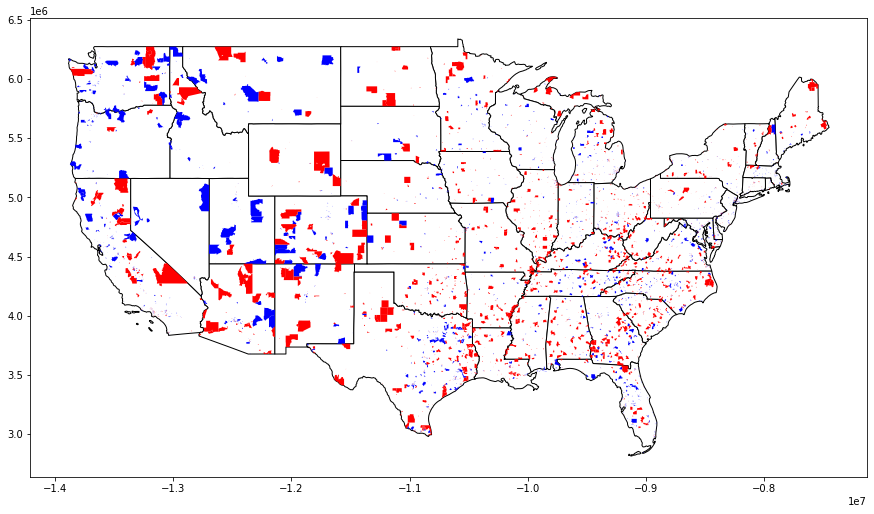

In [141]:
%matplotlib inline
state_basemap = states_continental.plot(edgecolor='black', color = 'white', figsize=(15,15))
opzones_continental_growers.plot(ax=state_basemap, color='blue')
opzones_continental_nongrowers.plot(ax=state_basemap, color = 'red')


In order to begin to evaluate how well the federal program is reaching disadvantaged communities, we need to look closer at a smaller area.

We will consider Michigan as an example, because this state's chosen Opportunity Zones had the highest average population growth, as well as the second-highest average white population growth, of any state in the country. 

Twenty-one of the 250 Opportunity Zones in Michigan — or close to one in 10 — are among the top quarter of fastest-growing Census tracts in the state, both in terms of median household income and population. Almost the same number of fastest-declining MI Census tracts are also Opportunity Zones.

Some of the Opportunity Zone designations follow logic; for example, every zone in Flint lost population over the decade. But in the Detroit area, it's much more of a mixed bag. About half of the Opportunity Zones I identified as being among the fastest growing in the state are in downtown Detroit.

#### Figure Two:
<i>In Michigan, while the chosen Opportunity Zones are widely spread across the state, this map showing those zones and 10 projects identified so far by the <a href = "https://eig.org/oz-activity-map">Economic Innovation Group</a> demonstrate that developers have so far favored more populace areas. Two towns with some of the most depressed zones — Flint and Saginaw — have been passed over for investments thus far, at least among those picked up by the think tank.</i>

<a href="marykwild.github.io">See the project maps at marykwild.github.io</a>

In [143]:
m

A small sample of 10 publicly announced Opportunity Zone investments in Michigan highlights some of the criticisms of the program. Of those 10, four lie directly within those zones that Census estimates indicate were already among the fastest growing in the state, both in population and income. A fifth in Grand Rapids is two blocks away from one of these tracts. None of these 10 projects lie within the declining Opportunity Zone tracts identified, meanwhile. 

However, the example of downtown Detroit provides a view into how juxtaposed wealth and prosperty can be even in nearby communities, with some of the fastest growing and fastest declining Opportunity Zones situated directly next to each other. Whether an investment in one Opportunity Zone will benefit another zone and its community nearby is a far more subjective question.

Other subjective questions, and harder ones: Whether developers can be incentivized to build and invest in communities they don't feel will pay them back, and whether these communities' economic futures should be entrusted to the will of private companies.

#### Figure Three: 
<i>This figure shows how of these 10 publicly announced Opportunity Zone investments, many lie within the fastest <strong>growing</strong> Opportunity Zones, while none are within the fastest <strong>declining</strong> Opportunity Zone tracts most in need of an economic boost. </i>

<a href="marykwild.github.io">See the project maps at marykwild.github.io</a>

In [152]:
map_top_bottom